In [26]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    ElasticNet,
    Lasso,
    LinearRegression,
    LogisticRegression,
    Ridge,
    RidgeClassifier,
)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from yellowbrick.model_selection import LearningCurve

plt.style.use("dark_background")
filterwarnings("ignore")

In [99]:
X, y = make_classification(
    n_samples=10000,
    n_features=500,
    n_informative=50,
    n_repeated=0,
    class_sep=1,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=3
)

In [100]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


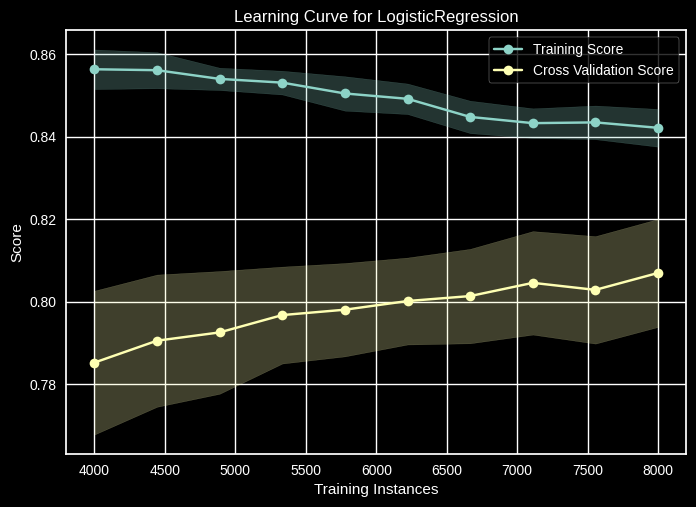

In [101]:
visualizer = (
    LearningCurve(LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10))
    .fit(X, y)
    .show()
)

In [102]:
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


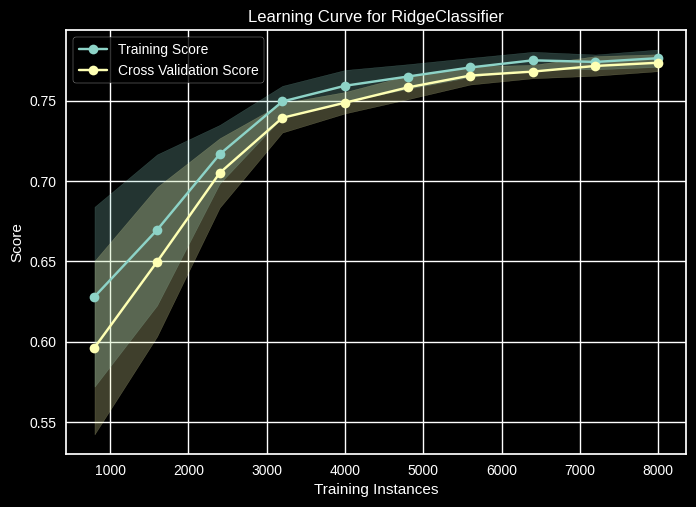

In [103]:
visualizer = (
    LearningCurve(RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10))
    .fit(X, y)
    .show()
)

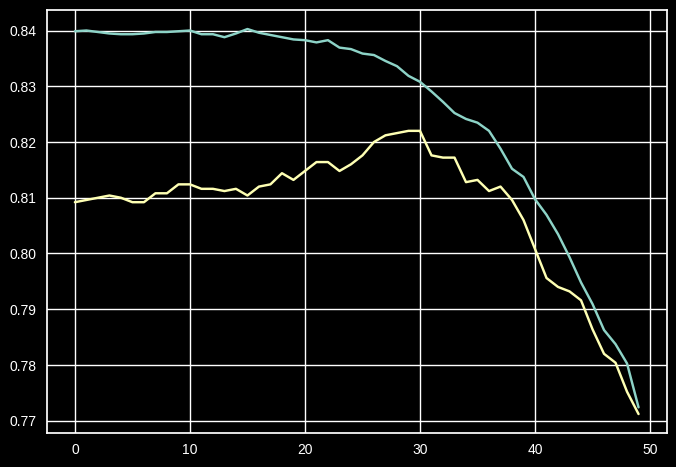

In [104]:
trains = []
tests = []
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [105]:
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


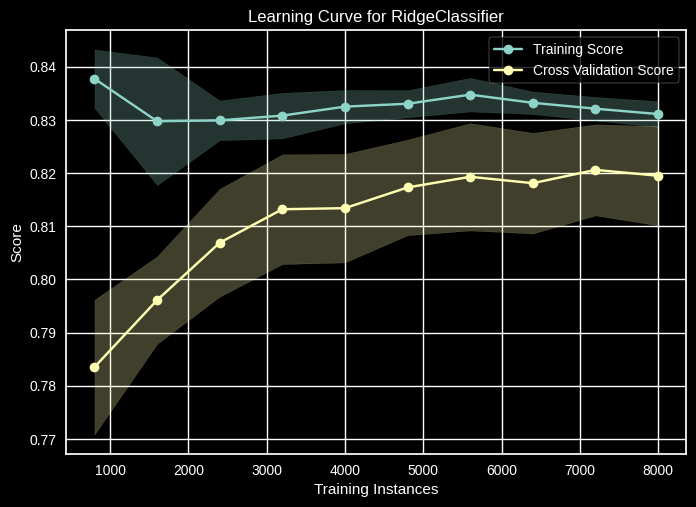

In [106]:
visualizer = (
    LearningCurve(RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10))
    .fit(X, y)
    .show()
)

In [107]:
dataset = np.genfromtxt(
    "https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv",
    delimiter=",",
)
X = dataset[:, :-1]
y = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [108]:
pd.DataFrame(dataset).describe()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,...,0.297077,0.346735,0.161667,0.440980,0.550358,0.204698,0.860314,0.254263,0.129599,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,...,0.284685,0.283915,0.194503,0.250593,0.252126,0.168367,0.265606,0.178510,0.161755,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,...,0.087624,0.158244,0.026190,0.260751,0.399728,0.071486,0.894405,0.117439,0.020748,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,...,0.142115,0.225410,0.065424,0.470858,0.615559,0.155388,0.972654,0.219227,0.070612,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,...,0.739077,0.440063,0.256045,0.653689,0.758547,0.311613,0.996599,0.344749,0.176497,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.797872,1.000000,0.914122,1.000000,0.964446,0.825020,1.000000,1.000000,1.000000,50.000000


In [109]:
lr = LinearRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.2f}")
print(f"Test score: {lr.score(X_test, y_test):.2f}")

Training score: 0.95
Test score: 0.61


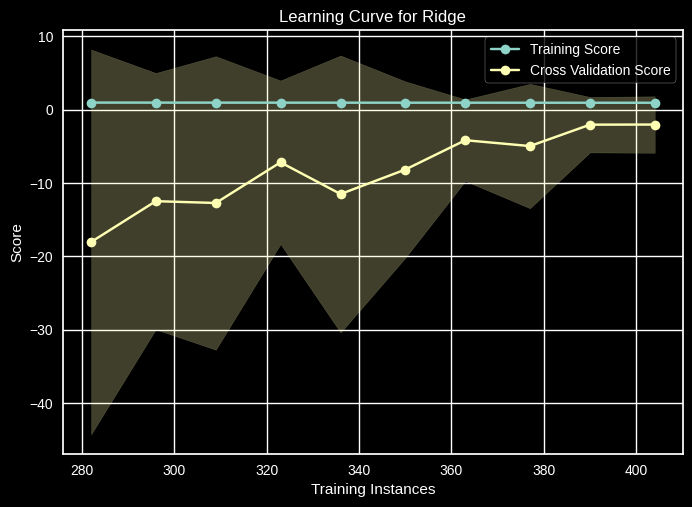

In [110]:
visualizer = (
    LearningCurve(
        Ridge(alpha=0.0001), scoring="r2", train_sizes=np.linspace(0.7, 1.0, 10)
    )
    .fit(X, y)
    .show()
)

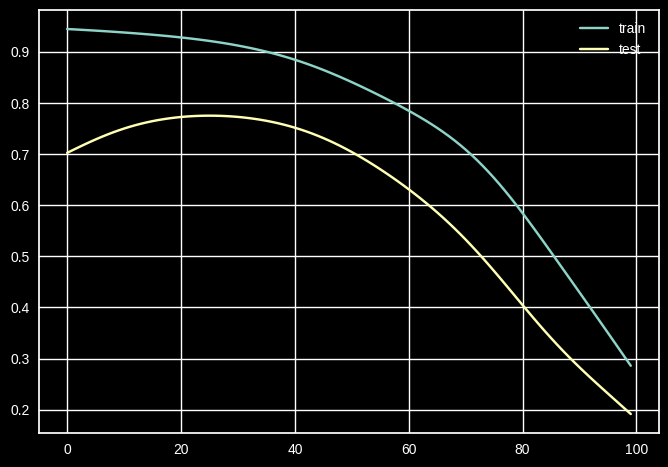

In [111]:
trains = []
tests = []
for alpha in np.logspace(-2, 3, 100):
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [112]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


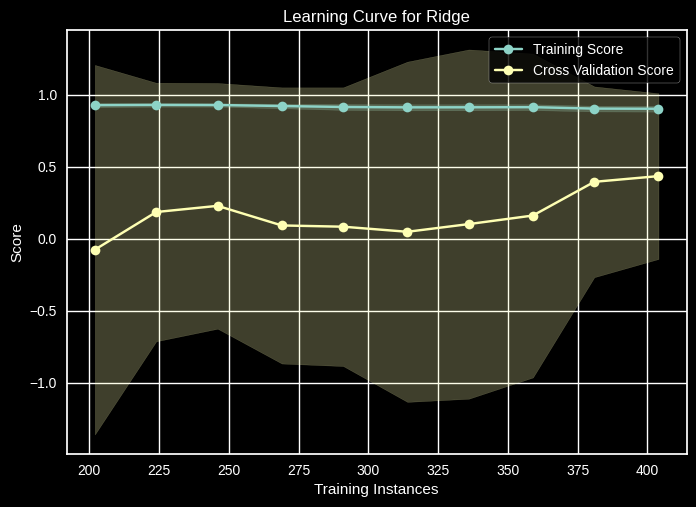

In [113]:
visualizer = (
    LearningCurve(
        Ridge(alpha=0.18), scoring="r2", train_sizes=np.linspace(0.5, 1.0, 10)
    )
    .fit(X, y)
    .show()
)

/usr/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.449e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.459e+02, tolerance: 3.233e+00
  model = cd_f

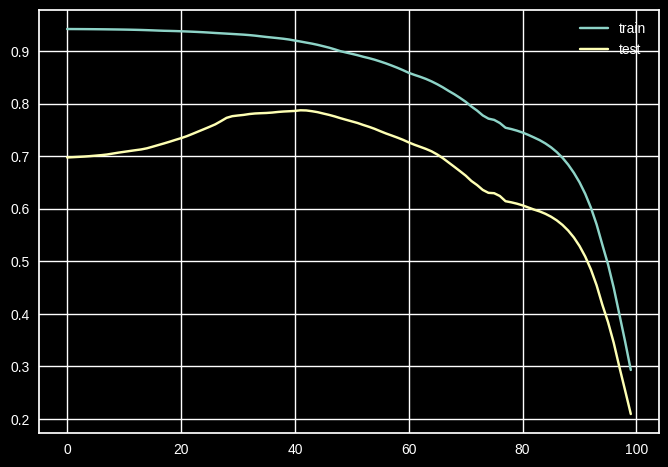

In [114]:
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
    ridge = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [115]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv",
    nrows=200,
)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [117]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


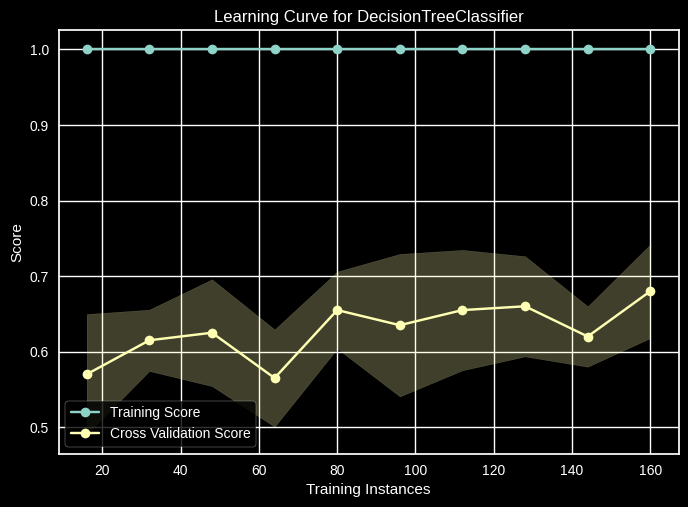

In [118]:
visualizer = (
    LearningCurve(
        DecisionTreeClassifier(random_state=1),
        scoring="accuracy",
        train_sizes=np.linspace(0.1, 1.0, 10),
    )
    .fit(X, y)
    .show()
)

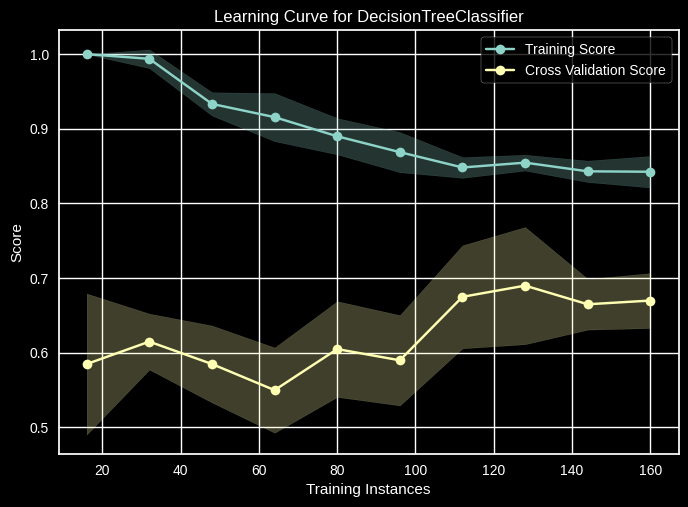

In [119]:
visualizer = (
    LearningCurve(
        DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
    )
    .fit(X, y)
    .show()
)

In [120]:
model = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % f1_score(y_train, y_train_pred))
print("Test score = %.4f" % f1_score(y_test, y_pred))

Train score = 0.7600
Test score = 0.5882


In [121]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv"
)
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [122]:
data = fetch_openml(name="delta_ailerons", parser="auto")
data.data.shape

(7129, 5)

In [123]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [124]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


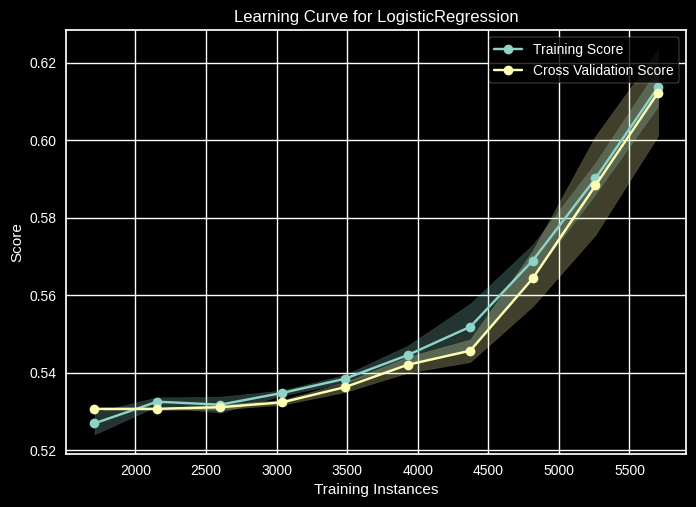

In [125]:
visualizer = (
    LearningCurve(
        LogisticRegression(), scoring="accuracy", train_sizes=np.linspace(0.3, 1.0, 10)
    )
    .fit(X, y)
    .show()
)

/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: 

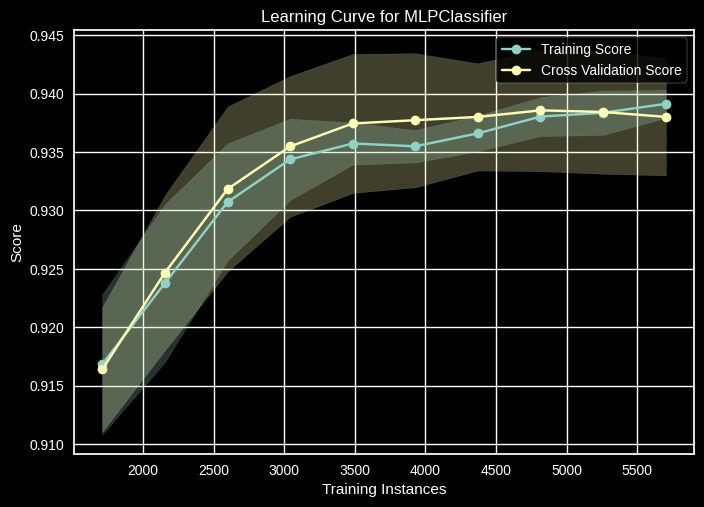

In [126]:
visualizer = (
    LearningCurve(
        MLPClassifier(), scoring="accuracy", train_sizes=np.linspace(0.3, 1.0, 10)
    )
    .fit(X, y)
    .show()
)

In [127]:
model = RidgeClassifier(alpha=0.001).fit(
    PolynomialFeatures(2).fit_transform(X_train), y_train
)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


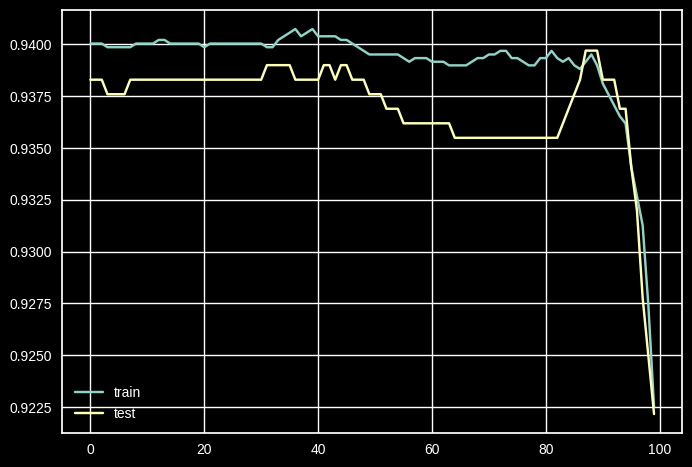

In [128]:
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
    ridge = RidgeClassifier(alpha=i).fit(
        PolynomialFeatures(2).fit_transform(X_train), y_train
    )
    trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
    tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

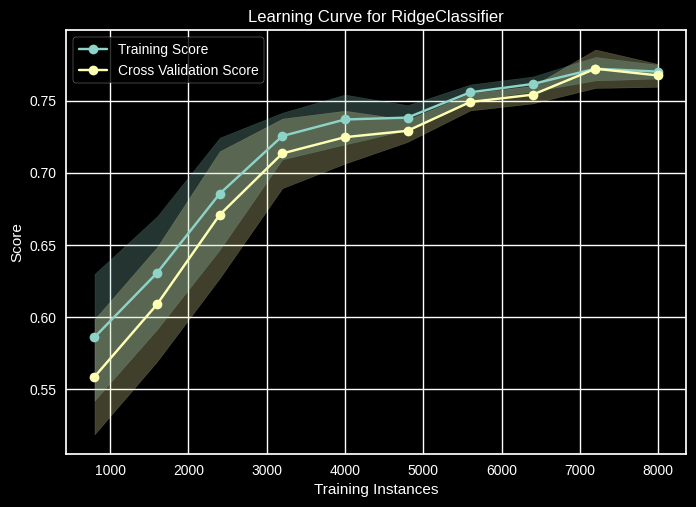

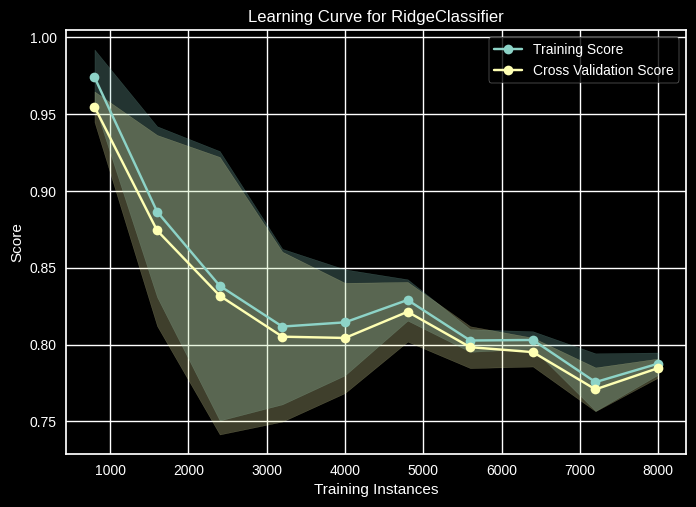

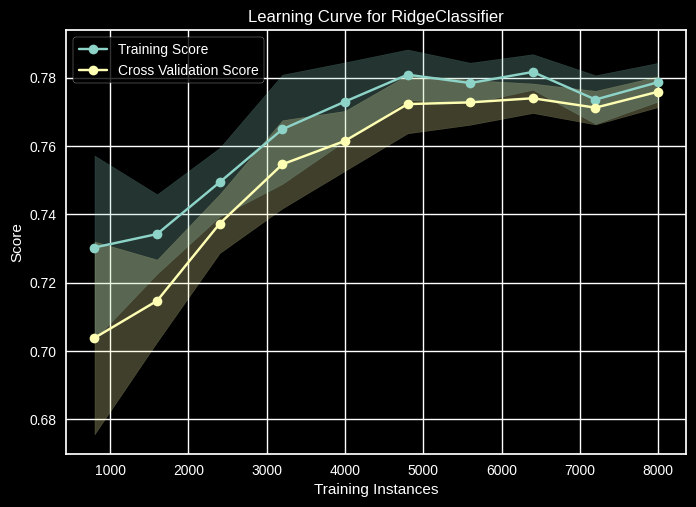

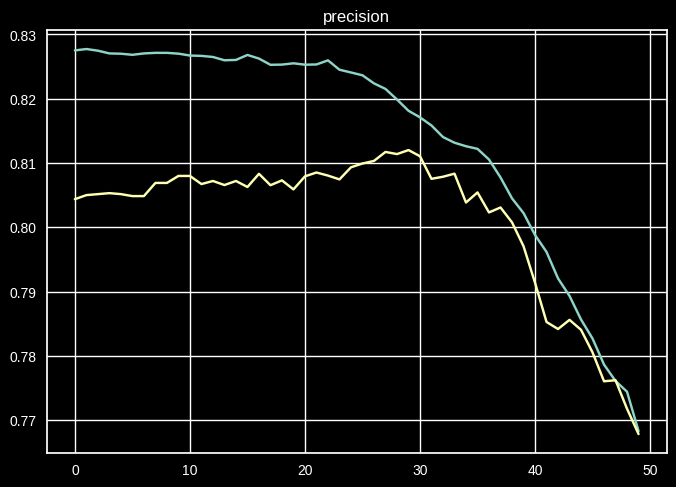

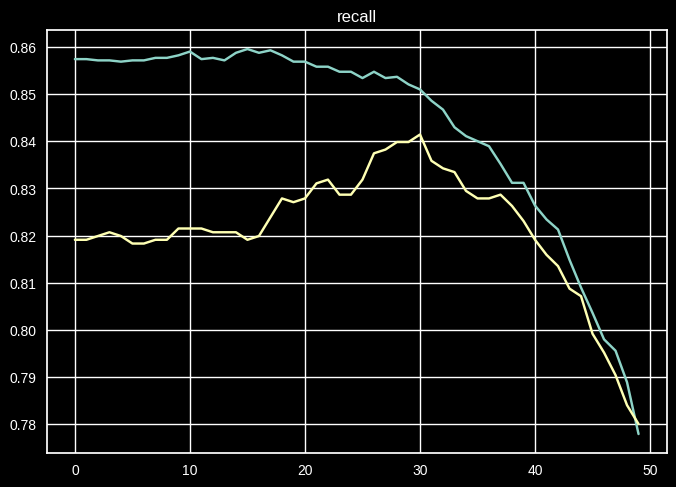

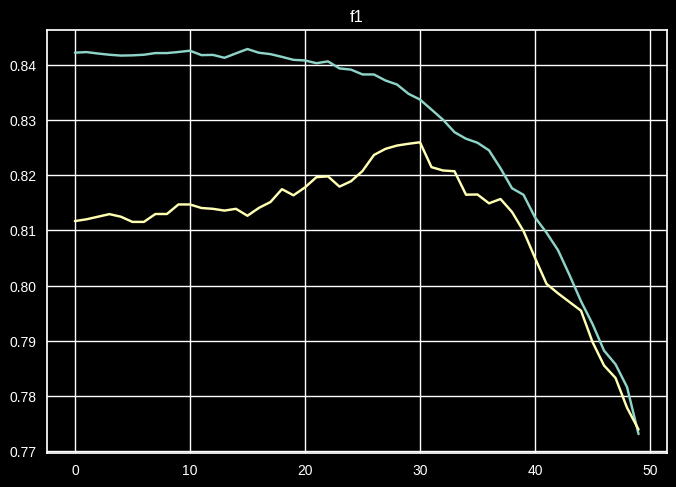

In [7]:
# 1

X, y = make_classification(
    n_samples=10000,
    n_features=500,
    n_informative=50,
    n_repeated=0,
    class_sep=1,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=3
)

LearningCurve(
    RidgeClassifier(alpha=1000000),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="precision",
).fit(X, y).show()
LearningCurve(
    RidgeClassifier(alpha=1000000),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="recall",
).fit(X, y).show()
LearningCurve(
    RidgeClassifier(alpha=1000000),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="f1",
).fit(X, y).show()

trains_precision = []
trains_recall = []
trains_f1 = []
tests_precision = []
tests_recall = []
tests_f1 = []
for i in np.logspace(2, 6, 50):
    model = RidgeClassifier(alpha=i).fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    trains_precision.append(precision_score(y_train, y_train_pred))
    trains_recall.append(recall_score(y_train, y_train_pred))
    trains_f1.append(f1_score(y_train, y_train_pred))

    tests_precision.append(precision_score(y_test, y_pred))
    tests_recall.append(recall_score(y_test, y_pred))
    tests_f1.append(f1_score(y_test, y_pred))

for title, tr, te in (
    ("precision", trains_precision, tests_precision),
    ("recall", trains_recall, tests_recall),
    ("f1", trains_f1, tests_f1),
):
    plt.title(title)
    plt.plot(tr)
    plt.plot(te)
    plt.show()

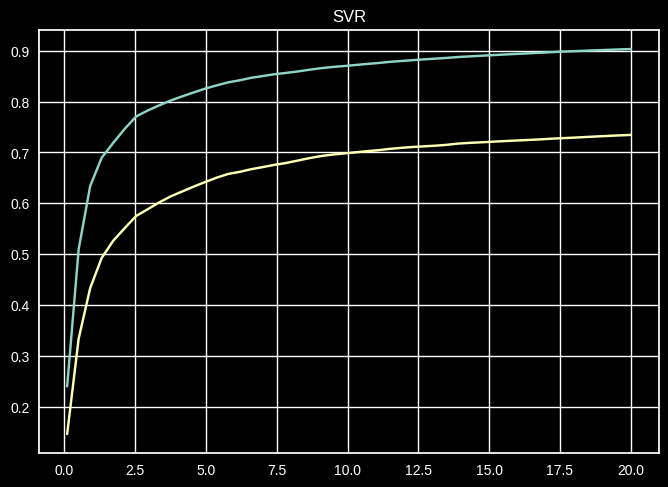

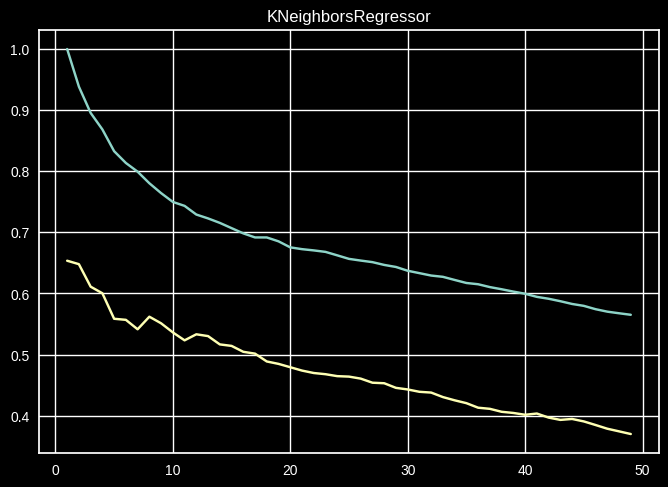

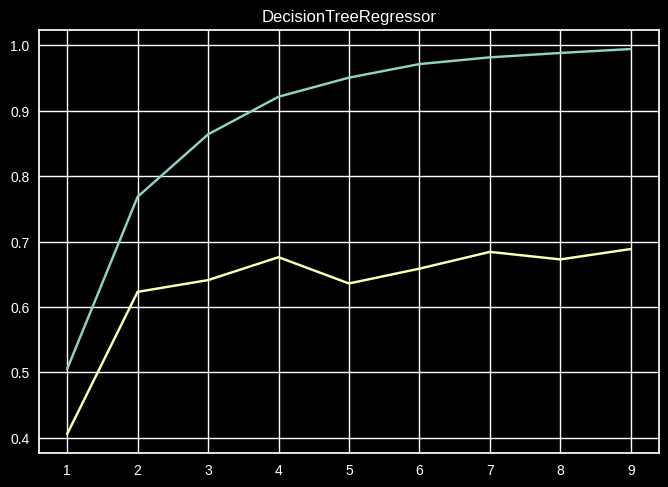

In [8]:
# 2

dataset = np.genfromtxt(
    "https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv",
    delimiter=",",
)
X = dataset[:, :-1]
y = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

trains = []
tests = []
xs = []
for C in np.linspace(0.1, 20):
    xs.append(C)
    model = SVR(C=C).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.title("SVR")
plt.plot(xs, trains, label="train")
plt.plot(xs, tests, label="test")
plt.show()

trains = []
tests = []
xs = []
for n_neighbors in range(1, 50):
    xs.append(n_neighbors)
    model = KNeighborsRegressor(n_neighbors).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.title("KNeighborsRegressor")
plt.plot(xs, trains, label="train")
plt.plot(xs, tests, label="test")
plt.show()

trains = []
tests = []
xs = []
for max_depth in range(1, 10):
    xs.append(max_depth)
    model = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.title("DecisionTreeRegressor")
plt.plot(xs, trains, label="train")
plt.plot(xs, tests, label="test")
plt.show()

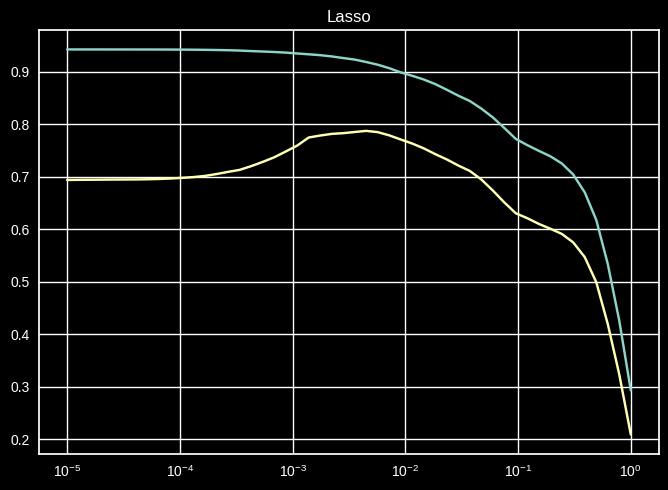

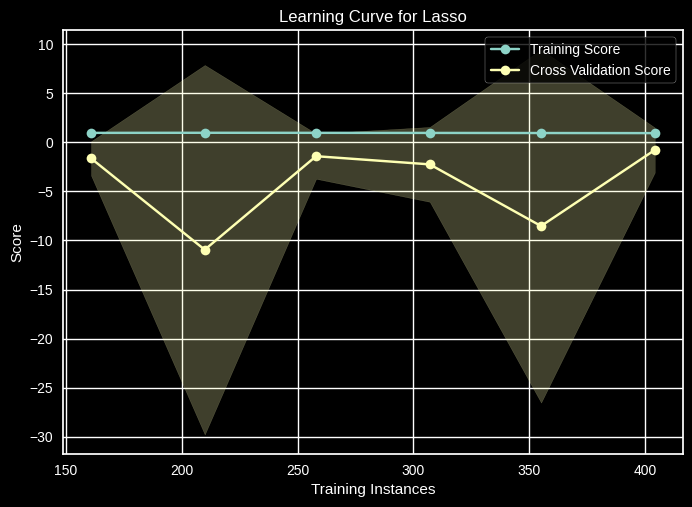

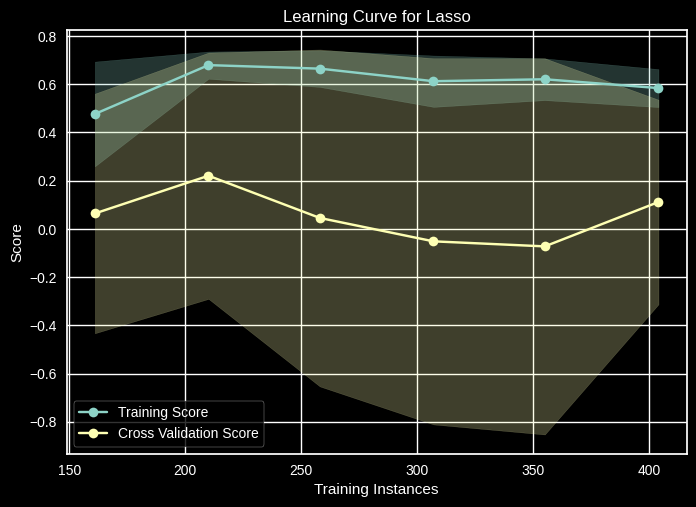

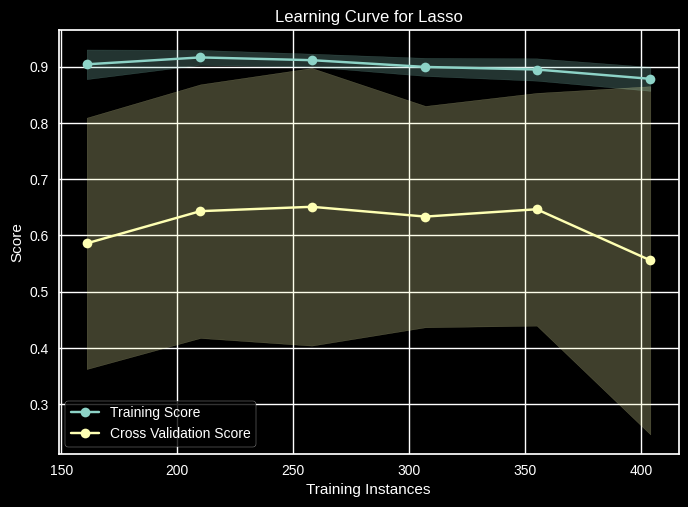

<Axes: title={'center': 'Learning Curve for Lasso'}, xlabel='Training Instances', ylabel='Score'>

In [9]:
# 3

trains = []
tests = []
xs = []
for alpha in np.logspace(-5, 0):
    xs.append(alpha)
    model = Lasso(alpha=alpha).fit(X_train, y_train)
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.title("Lasso")
plt.xscale("log")
plt.plot(xs, trains, label="train")
plt.plot(xs, tests, label="test")
plt.show()

LearningCurve(Lasso(alpha=0.0001), train_sizes=np.linspace(0.4, 1.0, 6)).fit(
    X, y
).show()
LearningCurve(Lasso(alpha=0.5), train_sizes=np.linspace(0.4, 1.0, 6)).fit(X, y).show()
LearningCurve(Lasso(alpha=0.01), train_sizes=np.linspace(0.4, 1.0, 6)).fit(X, y).show()

In [10]:
# 4

model = ElasticNet()

param_grid = {
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0],
    "l1_ratio": np.arange(0, 1, 0.05),
}
grid_search = GridSearchCV(model, param_grid, scoring="r2")
grid_search.fit(X_train, y_train)

for mean_score, params in sorted(
    zip(
        grid_search.cv_results_["mean_test_score"],
        grid_search.cv_results_["params"],
    ),
    key=lambda x: -x[0],
):
    print(f"{params}: {mean_score:.4f}")

{'alpha': 0.001, 'l1_ratio': 0.55}: 0.8453
{'alpha': 0.001, 'l1_ratio': 0.45}: 0.8452
{'alpha': 0.001, 'l1_ratio': 0.5}: 0.8452
{'alpha': 0.001, 'l1_ratio': 0.6000000000000001}: 0.8452
{'alpha': 0.001, 'l1_ratio': 0.4}: 0.8451
{'alpha': 0.001, 'l1_ratio': 0.35000000000000003}: 0.8449
{'alpha': 0.001, 'l1_ratio': 0.65}: 0.8447
{'alpha': 0.001, 'l1_ratio': 0.30000000000000004}: 0.8445
{'alpha': 0.001, 'l1_ratio': 0.25}: 0.8440
{'alpha': 0.001, 'l1_ratio': 0.7000000000000001}: 0.8437
{'alpha': 0.001, 'l1_ratio': 0.2}: 0.8434
{'alpha': 0.001, 'l1_ratio': 0.15000000000000002}: 0.8427
{'alpha': 0.001, 'l1_ratio': 0.75}: 0.8423
{'alpha': 0.001, 'l1_ratio': 0.1}: 0.8421
{'alpha': 0.001, 'l1_ratio': 0.05}: 0.8415
{'alpha': 0.0001, 'l1_ratio': 0.0}: 0.8413
{'alpha': 0.0001, 'l1_ratio': 0.05}: 0.8412
{'alpha': 0.0001, 'l1_ratio': 0.1}: 0.8410
{'alpha': 0.001, 'l1_ratio': 0.0}: 0.8408
{'alpha': 0.0001, 'l1_ratio': 0.15000000000000002}: 0.8408
{'alpha': 0.0001, 'l1_ratio': 0.2}: 0.8406
{'alpha': 0.

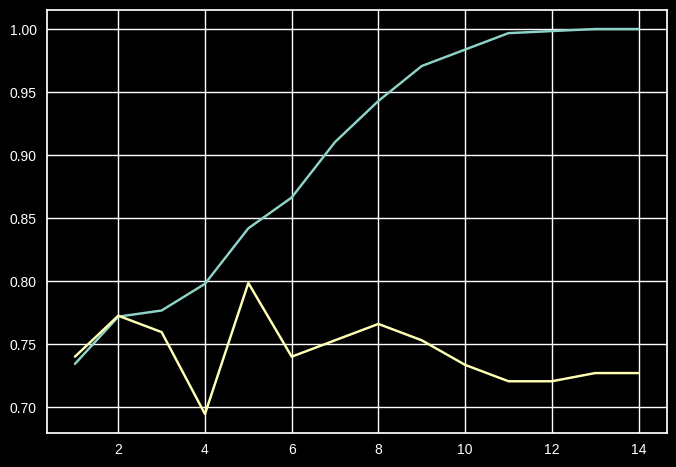

Train score = 0.8420
Test score = 0.7987


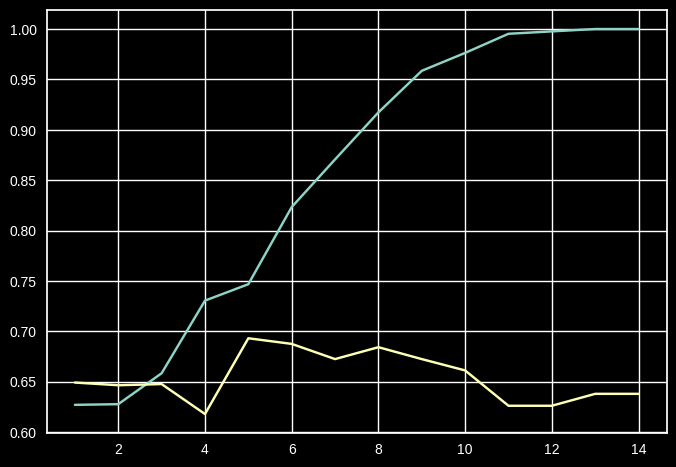

Train score = 0.7467
Test score = 0.6931


In [18]:
# 5

df = pd.read_csv(
    "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv"
)
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

trains = []
tests = []
xs = []
for max_depth in range(1, 15):
    xs.append(max_depth)
    model = DecisionTreeClassifier(random_state=1, max_depth=max_depth).fit(
        X_train, y_train
    )
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(xs, trains, label="train")
plt.plot(xs, tests, label="test")
plt.show()

model = DecisionTreeClassifier(random_state=1, max_depth=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

trains = []
tests = []
xs = []
for max_depth in range(1, 15):
    xs.append(max_depth)
    model = DecisionTreeClassifier(random_state=1, max_depth=max_depth).fit(
        X_train, y_train
    )
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    trains.append(f1_score(y_train, y_train_pred))
    tests.append(f1_score(y_test, y_pred))

plt.plot(xs, trains, label="train")
plt.plot(xs, tests, label="test")
plt.show()

model = DecisionTreeClassifier(random_state=1, max_depth=5).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % f1_score(y_train, y_train_pred))
print("Test score = %.4f" % f1_score(y_test, y_pred))

In [34]:
# 6

for name in (
    "phoneme",
    "banknote-authentication",
    "delta_ailerons",
    "mammography",
    "electricity",
    "mozilla4",
    "kropt",
    "nursery",
    "volcanoes-b3",
):
    data = fetch_openml(name=name, parser="auto")
    X = pd.get_dummies(data.data)
    y = data.target
    params = {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5],
    }
    gs = GridSearchCV(RandomForestClassifier(random_state=0), params)
    gs.fit(X, y)
    print(f"{name}: {gs.best_score_:.4f} with {gs.best_params_}")

phoneme: 0.9101 with {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
banknote-authentication: 0.9949 with {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
delta_ailerons: 0.9463 with {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
mammography: 0.9877 with {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
electricity: 0.7249 with {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
mozilla4: 0.8495 with {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
kropt: 0.1199 with {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
nursery: 0.6611 with {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
volcanoes-b3: 0.9658 with {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
